# Milky Way Datasets for WWT Visualization

In this notebook we will connect to the VizieR catalog service to pull Milky Way datasets of Globular Clusters, Open Clusters, Planetary Nebulae, Pulsars, Magnetars, Supernovae Remnants and OB Associations. As newer catalogs are made available the code can easily be updated. Catalogs are pulled from VizieR using Astroquery.

Mark SubbaRao<br> 
msubbarao@adlerplanetarium.org<br>

###### Set up Astropy and Astroquery to connect to VizieR Catalog Service

In [1]:
#Set up astropy and astroquery 
from astropy.table import Table,Column
from astropy.coordinates import SkyCoord, Distance
from astropy.io.votable import from_table, writeto
from astropy import units as u
from astroquery.vizier import Vizier
v = Vizier()
v.ROW_LIMIT = -1

###### Set up matplotlib for plotting

In [2]:
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

###### Connect to Worldwide Telescope and set up layer group

In [5]:
#Connect to WWT and set up Layer Group
from pywwt.mods import *
wwt = WWTClient(host="127.0.0.1") #Can pass a IP address here if WWT is running on a remote machine
wwt.new_layer_group("Sky","Galactic Datasets")

## Planetary Nebulae

Distances of Galactic Planetary Nebulae <a hhref="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?2008ApJ...689..194S&db_key=AST&nosetcookie=1">(Stanghellini+, 2008)</a><br>
VizieR Catalog: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=J/ApJ/689/194/table1&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">J/ApJ/689/194/table1</a><br>
563 Objects

###### Get Planetary Nebulae Catalog

In [3]:
Cats = v.get_catalogs('J/ApJ/689/194/table1')
PNeCat=Cats[0]
PNeCat.rename_column('_RAJ2000', 'RA')
PNeCat.rename_column('_DEJ2000', 'dec')
del PNeCat['_RA','_DE','SimbadName']
PNeCoords=SkyCoord(PNeCat['RA'],PNeCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(PNeCat['Dist'],u.pc),frame='icrs')

C:\Anaconda\lib\site-packages\astroquery\vizier\core.py:556: UserWarning: VOTABLE parsing raised exception: 
  warnings.warn("VOTABLE parsing raised exception: {0}".format(ex))


###### Print Planetary Nebulae Catalog

In [4]:
PNeCat #just first 10

<Table rows=563 names=('RA','dec','Name','tau','rad','F5GHz','Dist') units=('deg','deg',None,None,'arcs','Jy','pc')>
masked_array(data = [ (3.25423, 72.52197, 'NGC   40', 3.4600000381469727, 18.200000762939453, 0.46000000834465027, 1249)
 (11.76391, -11.87192, 'NGC  246', 5.309999942779541, 112.0, 0.24799999594688416, 475)
 (25.58312, 51.57532, 'NGC  650-1', 5.239999771118164, 69.19999694824219, 0.10999999940395355, 746)
 (53.31102, -25.87165, 'NGC 1360', 5.820000171661377, 192.0, 0.22200000286102295, 351)
 (61.74746, 60.92067, 'NGC 1501', 4.079999923706055, 25.899999618530273, 0.2240000069141388, 1167)
 (62.32079, 30.77596, 'NGC 1514', 4.590000152587891, 50.20000076293945, 0.2619999945163727, 760)
 (63.56576, -12.73936, 'NGC 1535', 3.309999942779541, 9.199999809265137, 0.16599999368190765, 2305)
 (85.52583, 9.08619, 'NGC 2022', 3.619999885559082, 9.699999809265137, 0.09099999815225601, 2518)
 (107.34384, -0.80655, 'NGC 2346', 4.539999961853027, 27.299999237060547, 0.0860000029206276, 1369)
 (111.3945, 29.49067, 'NGC 2371-2', 4.329999923706055, 21.799999237060547, 0.09000000357627869, 1554)
 (112.29486, 20.9118, 'NGC 2392', 3.930000066757202, 22.399999618530273, 0.2370000034570694, 1259)
 (115.46046, -14.73547, 'NGC 2438', 4.829999923706055, 35.20000076293945, 0.0729999989271164, 1215)
 (115.47879, -18.20825, 'NGC 2440', 3.4200000762939453, 16.399999618530273, 0.41100001335144043, 1359)
 (116.85946, -27.33517, 'NGC 2452', 3.809999942779541, 9.399999618530273, 0.054999999701976776, 2838)
 (128.3475, -16.14931, 'NGC 2610', 4.579999923706055, 17.200000762939453, 0.03099999949336052, 2215)
 (138.11067, -42.42748, 'NGC 2792', 3.1600000858306885, 6.5, 0.11599999666213989, 3050)
 (139.0069, -36.62743, 'NGC 2818', 4.690000057220459, 20.0, 0.032999999821186066, 1998)
 (140.35557, -58.3113, 'NGC 2867', 2.930000066757202, 8.0, 0.29899999499320984, 2228)
 (141.76258, -56.10586, 'NGC 2899', 4.96999979019165, 45.0, 0.0860000029206276, 1014)
 (151.75735, -40.43641, 'NGC 3132', 3.940000057220459, 22.5, 0.23000000417232513, 1263)
 (152.33712, -80.85854, 'NGC 3195', 4.659999847412109, 20.0, 0.03500000014901161, 1975)
 (154.4606, -62.67003, 'NGC 3211', 3.509999990463257, 8.0, 0.07999999821186066, 2901)
 (156.19211, -18.6424, 'NGC 3242', 3.2200000286102295, 18.600000381469727, 0.8349999785423279, 1094)
 (168.69889, 55.01903, 'NGC 3587', 5.639999866485596, 100.0, 0.09099999815225601, 621)
 (171.9906, -59.9577, 'NGC 3699', 4.480000019073486, 22.399999618530273, 0.06700000166893005, 1620)
 (177.57388, -57.18247, 'NGC 3918', 2.619999885559082, 9.399999618530273, 0.8569999933242798, 1639)
 (181.06173, -67.30988, 'NGC 4071', 5.179999828338623, 31.5, 0.026000000536441803, 1596)
 (186.12817, -18.78483, 'NGC 4361', 4.449999809265137, 40.5, 0.23000000417232513, 887)
 (203.38692, -65.97419, 'NGC 5189', 4.590000152587891, 70.0, 0.5070000290870667, 546)
 (207.76384, -51.20577, 'NGC 5307', 3.2200000286102295, 6.300000190734863, 0.0949999988079071, 3235)
 (228.21272, -38.12601, 'NGC 5873', 3.0799999237060547, 3.5, 0.04100000113248825, 5445)
 (229.20807, -45.64957, 'NGC 5882', 2.7699999809265137, 7.0, 0.33399999141693115, 2362)
 (236.9215, -61.21822, 'NGC 5979', 2.740000009536743, 4.0, 0.11699999868869781, 4075)
 (240.33804, -34.54328, 'NGC 6026', 4.71999979019165, 16.899999618530273, 0.02199999988079071, 2398)
 (241.11082, 40.68224, 'NGC 6058', 5.03000020980835, 13.199999809265137, 0.007000000216066837, 3538)
 (243.242, -36.22946, 'NGC 6072', 4.429999828338623, 35.0, 0.1809999942779541, 1017)
 (247.87761, -40.25342, 'NGC 6153', 2.9800000190734863, 12.300000190734863, 0.6320000290870667, 1482)
 (251.12288, 23.79991, 'NGC 6210', 3.009999990463257, 8.100000381469727, 0.25600001215934753, 2282)
 (258.43421, -37.10443, 'NGC 6302', 2.7699999809265137, 22.299999237060547, 3.4030001163482666, 741)
 (258.51791, -12.90993, 'NGC 6309', 3.059999942779541, 6.900000095367432, 0.16699999570846558, 2736)
 (260.19292, -51.75426, 'NGC 6326', 3.299999952316284, 6.0, 0.07299999892

###### Plot the catalog

In [5]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
ax.set_title("Planetary Nebulae")
ax.scatter(PNeCoords.galactic.l.wrap_at(180.*u.degree).radian,PNeCoords.galactic.b.radian,c="green")

###### Send planetary nebulae to WWT

In [8]:
#Set up WWT layer
PNe_layer = wwt.new_layer("Galactic Datasets", "Planetary Nebulae", PNeCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "AltColumn":"6",\
              "AltType":"Distance",\
              "AltUnit":"Parsecs",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:0:255:0",\
              "TimeSeries":"False"}
PNe_layer.set_properties(props_dict)
#Send data to WWT client
PNe_layer.update(data=PNeCat, purge_all=True, no_purge=False, show=True)

## Globular Clusters

Properties of Galactic Globular Clusters<a hhref="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?2014MNRAS.441.1105F&db_key=AST&nosetcookie=1">((Francis+, 2014))</a><br>
VizieR Catalog: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VII/271/catalog&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">VII/271/catalog</a><br>
157 Objects

###### Get Globular Cluster Catalog

In [6]:
Cats = v.get_catalogs('VII/271/catalog')
GCCat=Cats[0]
del GCCat['RAJ2000','DEJ2000','SimbadName','Name','mu0','r_Dist','DistH','X','Y','Z','Rgc','E_B-V_','RV','r_RV','q_RV','r__Fe_H_']
GCCat.rename_column('__Fe_H_', 'Fe/H')
GCCat.rename_column('_RAJ2000', 'RA')
GCCat.rename_column('_DEJ2000', 'dec')
#Create Column with dist in pc, not kpc (for WWT)
distCol=Column(1000*GCCat['Dist'].filled(0),name='distance',meta={'ucd': 'pos.distance'}, unit='pc')
GCCat.add_column(distCol)
del GCCat['Dist']
GCCoords=SkyCoord(GCCat['RA'],GCCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(GCCat['distance'],u.pc),frame='icrs')

###### Print Globular Cluster Catalog

In [40]:
GCCat[:10] #just first 10

<Table rows=10 names=('RA','dec','ID','Fe/H','distance') units=('deg','deg',None,'[-]','pc')>
masked_array(data = [(6.0234, -72.0813, 'NGC 104', -0.6899999976158142, 4580.0)
 (13.1885, -26.5826, 'NGC 288', -1.350000023841858, 9360.0)
 (15.8094, -70.8488, 'NGC 362', -1.309999942779541, 8840.0)
 (30.7375, -3.2528, 'Whiting 1', -0.699999988079071, 29400.0)
 (48.0675, -55.2162, 'NGC 1261', -1.2799999713897705, 16540.0)
 (53.3335, 79.5811, 'Pal 1', -0.6499999761581421, 12970.0)
 (58.76, -49.6067, 'AM 1', -1.7000000476837158, 123200.0)
 (66.1863, -21.19, 'Eridanus', -1.4700000286102295, 89760.0)
 (71.5246, 31.3815, 'Pal 2', -1.4199999570846558, 27670.0)
 (78.5286, -40.0461, 'NGC 1851', -0.9800000190734863, 12010.0)],
             mask = [(False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)],
       fill_value = (1e+20, 1e+20, 'N/A', 1.0000000200408773e+20, 1.0000000200408773e+20),
            dtype = [('RA', '<f8'), ('dec', '<f8'), ('ID', 'S15'), ('Fe/H', '<f4'), ('distance', '<f4')])

###### Plot Globular Cluster Catalog

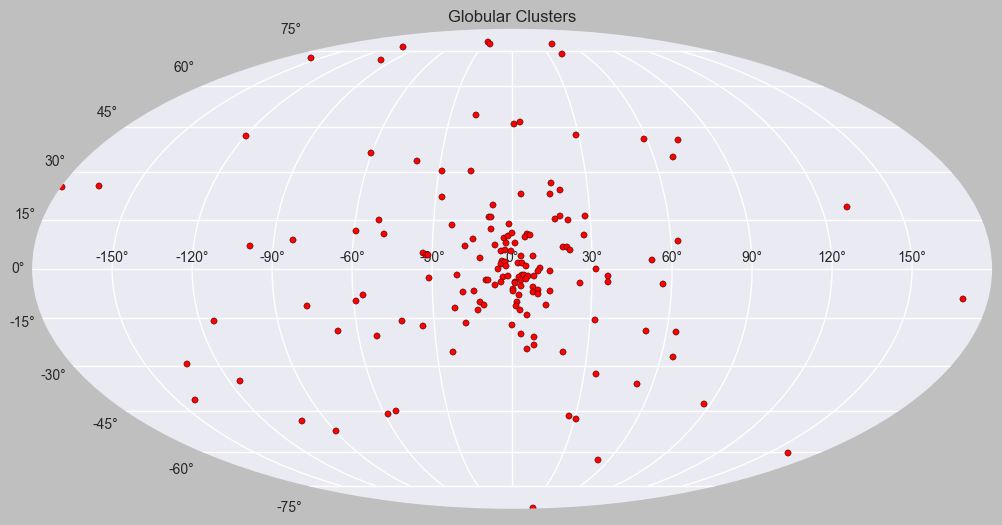

In [7]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
ax.set_title("Globular Clusters")
ax.scatter(GCCoords.galactic.l.wrap_at(180.*u.degree).radian,GCCoords.galactic.b.radian,c='red')

###### Send Globular Clusters to WWT

In [18]:
#Set up WWT layer
GC_layer = wwt.new_layer("Galactic Datasets", "Globular Clusters", GCCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "AltColumn":"4",\
              "AltType":"Distance",\
              "AltUnit":"Parsecs",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:255:255:255",\
              "TimeSeries":"False"}
GC_layer.set_properties(props_dict)
#Send data to WWT client
GC_layer.update(data=GCCat, purge_all=True, no_purge=False, show=True)

## Open Clusters

Optically visible open clusters and Candidates<a href="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?2002A%26A...389..871D&db_key=AST&nosetcookie=1"> (Dias+ 2002-2013)</a><br>
VizieR Catalog: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=B/ocl/clusters&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">B/ocl/clusters</a><br>
2174 Objects

###### Get Open Cluster Catalog

In [8]:
Cats = v.get_catalogs('B/ocl/clusters')
ocCat=Cats[0]
ocCat.keep_columns(["Cluster","_RAJ2000","_DEJ2000","Dist","Diam","Age"])
ocCat.rename_column('_RAJ2000', 'RA')
ocCat.rename_column('_DEJ2000', 'dec')
#Create Column with dist in pc (not kpc for WWT)
distCol=Column(ocCat['Dist'].filled(0),name='distance',meta={'ucd': 'pos.distance'}, unit='pc')
ocCat.add_column(distCol)
del ocCat['Dist']
ocCoords=SkyCoord(ocCat['RA'],ocCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(ocCat['distance'],u.pc),frame='icrs')

###### Print Open Cluster Calalog

In [41]:
ocCat[:10] #just first 10

<Table rows=10 names=('RA','dec','Cluster','Diam','Age','distance') units=('deg','deg',None,'arcm','[yr]','pc')>
masked_array(data = [(88.0542, 26.9925, 'Majaess 68', 22.0, --, 0)
 (359.275, 65.4144, 'FSR 0469', 1.7999999523162842, --, 0)
 (357.0292, 36.205, 'Alessi 22', 82.0, --, 0)
 (356.8542, 63.2264, 'FSR 0453', 4.5, --, 0)
 (356.8292, 60.4675, 'Majaess 227', 13.0, --, 0)
 (354.95, 61.9281, 'Majaess 225', 12.0, --, 0)
 (57.9042, 51.5167, 'Majaess 36', 4.0, --, 0)
 (1.1708, 56.0833, 'Stock 19', 4.0, --, 0)
 (88.075, 29.9044, 'FSR 0828', 2.700000047683716, --, 0)
 (1.8417, 64.9728, 'Majaess 1', 5.0, --, 0)],
             mask = [(False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)],
       fill_value = (1e+20, 1e+20, 'N/A', 1.0000000200408773e+20, 1.0000000200408773e+20, 16959),
            dtype = [('RA', '<f8'), ('dec', '<f8'), ('Cluster', 'S17'), ('Diam', '<f4'), ('Age', '<f4'), ('distance', '<i2')])

###### Plot Open Cluster Catalog

In [28]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
plt.title("Open Clusters",fontsize=16)
ax.scatter(ocCoords.galactic.l.wrap_at(180.*u.degree).radian,ocCoords.galactic.b.radian,c='green')

###### Send Open Cluster catalog to WWT

In [13]:
#Set up WWT layer
OC_layer = wwt.new_layer("Galactic Datasets", "Open Clusters", ocCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "AltColumn":"5",\
              "AltType":"Distance",\
              "AltUnit":"Parsecs",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:255:255:0",\
              "TimeSeries":"False"}
OC_layer.set_properties(props_dict)
#Send data to WWT client
OC_layer.update(data=ocCat, purge_all=True, no_purge=False, show=True)

## Supernova Remnants

A revised Galactic supernova remnant catalogue<a href="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?2014yCat.7272....0G&db_key=AST&nosetcookie=1http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?2009BASI...37...45G&db_key=AST&nosetcookie=1"> (Green 2014)</a><br>
VizieR Catalog: <a href="http://vizier.ast.cam.ac.uk/viz-bin/VizieR?-source=VII/272">VII/272/snrs</a><br>
294 Objects<br><br>
This catalog does not provide distances, so we will only provide code to visualize in WWT.

###### Get Supernova Remnant Catalog

In [10]:
Cats = v.get_catalogs('VII/272/snrs')
snrCat=Cats[0]
snrCat.keep_columns(["SNR","_RAJ2000","_DEJ2000","MajDiam","S_1GHz_"])
snrCat.rename_column('S_1GHz_', 'S_1GHz')
snrCat.rename_column('_RAJ2000', 'RA')
snrCat.rename_column('_DEJ2000', 'dec')
snrCoords=SkyCoord(snrCat['RA'],snrCat['dec'],unit=(u.degree, u.degree),frame='icrs')

###### Print Supernova Remnant Catalog

In [49]:
print len(snrCat)
snrCat[:10] #Just first 10

294


<Table rows=10 names=('RA','dec','SNR','MajDiam','S_1GHz') units=('deg','deg',None,'arcm','Jy')>
masked_array(data = [(266.4333, -29.0, 'G000.0+00.0', 3.5, 100.0)
 (266.5625, -28.6333, 'G000.3+00.0', 15.0, 22.0)
 (266.8375, -28.15, 'G000.9+00.1', 8.0, 18.0)
 (267.125, -28.15, 'G001.0-00.1', 8.0, 15.0)
 (267.4125, -27.7667, 'G001.4-00.1', 10.0, 2.0)
 (267.1875, -27.1667, 'G001.9+00.3', 1.5, 0.6000000238418579)
 (268.8583, -25.8333, 'G003.7-00.2', 14.0, 2.299999952316284)
 (268.2292, -25.4667, 'G003.8+00.3', 18.0, 3.0)
 (272.2292, -27.05, 'G004.2-03.5', 28.0, 3.200000047683716)
 (262.675, -21.4833, 'G004.5+06.8', 3.0, 19.0)],
             mask = [(False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)],
       fill_value = (1e+20, 1e+20, 'N/A', 1.0000000200408773e+20, 1.0000000200408773e+20),
            dtype = [('RA', '<f8'), ('dec', '<f8'), ('SNR', 'S11'), ('MajDiam', '<f4'), ('S_1GHz', '<f4')])

###### Plot Supernova Remnant Catalog

In [21]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
plt.title("Supernova Remnants",fontsize=16)
ax.scatter(snrCoords.galactic.l.wrap_at(180.*u.degree).radian,snrCoords.galactic.b.radian,c='magenta')

###### Send Supernova Remnants to WWT

In [15]:
#Set up WWT layer
SNR_layer = wwt.new_layer("Galactic Datasets", "Supernova Remnants", snrCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:255:0:255",\
              "TimeSeries":"False"}
SNR_layer.set_properties(props_dict)
#Send data to WWT client
SNR_layer.update(data=snrCat, purge_all=True, no_purge=False, show=True)

## Pulsars

Catalog of Pulsars<a href="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?1993ApJS...88..529T&db_key=AST&nosetcookie=1">(Taylor+ 1995)</a><br>
VizieR Catalog: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VII/189/table1&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">VII/189/table1</a><br>
706 Objects

###### Get Pulsar Catalog

In [23]:
Cats = v.get_catalogs('VII/189/table1')
pulsarCat=Cats[0]
pulsarCat.keep_columns(["Jname","RAJ2000","DEJ2000","dist","P","Age"])
#Create Column with dist in pc (not kpc) for WWT
distCol=Column(1000*pulsarCat['dist'].filled(0),name='distance',meta={'ucd': 'pos.distance'}, unit='pc')
pulsarCat.add_column(distCol)
del pulsarCat['dist']
pulsarCat.rename_column('RAJ2000', 'RA')
pulsarCat.rename_column('DEJ2000', 'dec')
pulsarCoords=SkyCoord(pulsarCat['RA'],pulsarCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(pulsarCat['distance'],u.pc),frame='icrs')

###### Print Pulsar Catalog

In [18]:
print len(pulsarCat)
pulsarCat[:10] #just first 10

706


<Table rows=10 names=('Jname','RA','dec','P','Age','distance') units=(None,'deg','deg','s','[yr]','pc')>
masked_array(data = [('0006+1834', 1.52, 18.58306, 0.69374767047, 6.719, 700.0)
 ('0014+4746', 3.57393, 47.77585, 1.24069897808, 7.543, 1840.0)
 ('0023-7204C', 5.95976, -72.0754, 0.00575678001161, --, 4500.0)
 ('0024-7204D', 6.05782, -72.07884, 0.0053575732859, --, 4500.0)
 ('0024-7204E', 6.02464, -72.07304, 0.003536329, --, 4500.0)
 ('0024-7204F', 6.02464, -72.07304, 0.002623579, --, 4500.0)
 ('0024-7204G', 6.02464, -72.07304, 0.004040379, --, 4500.0)
 ('0024-7204H', 6.02464, -72.07304, 0.0032105, --, 4500.0)
 ('0024-7204I', 6.02464, -72.07304, 0.003484993, --, 4500.0)
 ('0024-7204J', 6.02464, -72.07304, 0.0021006334, --, 4500.0)],
             mask = [(False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)
 (False, False, False, False, True, False)],
       fill_value = ('N/A', 1e+20, 1e+20, 1e+20, 1e+20, 1e+20),
            dtype = [('Jname', 'S12'), ('RA', '<f8'), ('dec', '<f8'), ('P', '<f8'), ('Age', '<f8'), ('distance', '<f8')])

###### Plot Pulsar Catalog

In [24]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
plt.title("Pulsars",fontsize=16)
ax.scatter(pulsarCoords.galactic.l.wrap_at(180.*u.degree).radian,pulsarCoords.galactic.b.radian,c='orange')


###### Send Pulsar Catalog to WWT

In [86]:
#Set up WWT layer
pulsar_layer = wwt.new_layer("Galactic Datasets", "Pulsars", pulsarCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "AltColumn":"5",\
              "AltType":"Distance",\
              "AltUnit":"Parsecs",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:0:255:255",\
              "TimeSeries":"False"}
pulsar_layer.set_properties(props_dict)
#Send data to WWT client
pulsar_layer.update(data=pulsarCat, purge_all=True, no_purge=False, show=True)

## Magnetars

The McGill magnetar catalog <a href="http://cdsbib.u-strasbg.fr/cgi-bin/cdsbib?2014ApJS..212....6O">(Olausen+, 2014)</a><br>
VizieR Catalog: <a href="http://cdsbib.u-strasbg.fr/cgi-bin/cdsbib?2014ApJS..212....6O">J/ApJS/212/6/table9</a><br>
26 Objects

###### Get Magnetar Catalog

In [14]:
Cats = v.get_catalogs('J/ApJS/212/6/table9')
magCat=Cats[0]
magCat.keep_columns(["Name","_RAJ2000","_DEJ2000","Dist","B","Per"])
magCat.rename_column('_RAJ2000', 'RA')
magCat.rename_column('_DEJ2000', 'dec')
#Create Column with dist in pc, not kpc (for WWT)
distCol=Column(1000*magCat['Dist'].filled(0),name='distance',meta={'ucd': 'pos.distance'}, unit='pc')
magCat.add_column(distCol)
del magCat['Dist']
magCoords=SkyCoord(magCat['RA'],magCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(magCat['distance'],u.pc),frame='icrs')

###### Print Magnetar Catalog

In [62]:
print len(magCat)
magCat[:10] #just first 10

26


<Table rows=10 names=('RA','dec','Name','Per','B','distance') units=('deg','deg',None,'s','1e+10 T','pc')>
masked_array(data = [ (15.17975, -72.192722, 'CXOU J010043.1-721134', 8.020392, 3.9000000953674316, 62400.0)
 (26.593362, 61.750886, '4U 0142+61', 8.68832877, 1.2999999523162842, 3600.0)
 (64.641112, 57.539697, 'SGR 0418+5729', 9.07838822, 0.061000000685453415, 2000.0)
 (75.278167, 45.276089, 'SGR 0501+4516', 5.76209653, 1.899999976158142, 2000.0)
 (81.503708, -66.07675, 'SGR 0526-66', 8.0544, 5.599999904632568, 53600.0)
 (162.52975, -59.889278, '1E 1048.1-5937', 6.4578754, 3.9000000953674316, 9000.0)
 (237.725516, -54.306698, '1E 1547.0-5408', 2.0721255, 3.200000047683716, 4500.0)
 (245.687042, -49.847972, 'PSR J1622-4950', 4.3261, 2.700000047683716, 9000.0)
 (248.966017, -47.589808, 'SGR 1627-41', 2.594578, 2.200000047683716, 11000.0)
 (251.7925, -45.871361, 'CXOU J164710.2-455216', 10.610644, 0.6600000262260437, 3900.0)],
             mask = [(False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)
 (False, False, False, False, False, False)],
       fill_value = (1e+20, 1e+20, 'N/A', 1e+20, 1.0000000200408773e+20, 1.0000000200408773e+20),
            dtype = [('RA', '<f8'), ('dec', '<f8'), ('Name', 'S21'), ('Per', '<f8'), ('B', '<f4'), ('distance', '<f4')])

###### Plot Magnetar Catalog

In [26]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
plt.title("Magnetars",fontsize=16)
ax.scatter(magCoords.galactic.l.wrap_at(180.*u.degree).radian,magCoords.galactic.b.radian,c='yellow')

###### Send Magnetar Data to WWT

In [15]:
#Set up WWT layer
Magnetar_layer = wwt.new_layer("Galactic Datasets", "Supernova Remnants", magCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "AltColumn":"5",\
              "AltType":"Distance",\
              "AltUnit":"Parsecs",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:127:0:255",\
              "TimeSeries":"False"}
SNR_layer.set_properties(props_dict)
#Send data to WWT client
SNR_layer.update(data=amgCat, purge_all=True, no_purge=False, show=True)

## OB Associations

New list of OB associations<a href="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?1995PAZh...21...13M&db_key=AST&nosetcookie=1">(Melnik+, 1995) </a><br>
VizieR Catalog: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=J/PAZh/21/13/table&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">J/PAZh/21/13/table</a><br>
88 Objects

###### Get OB Association Catalog

In [16]:
Cats = v.get_catalogs('J/PAZh/21/13/table')
OBCat=Cats[0]
OBCat.keep_columns(["AssME","_RA.icrs","_DE.icrs","D","Ntot"])
#Create Column with dist in pc (not kpc)
distCol=Column(1000*OBCat['D'].filled(0),name='distance',meta={'ucd': 'pos.distance'}, unit='pc')
OBCat.add_column(distCol)
del OBCat['D']
OBCat.rename_column('_RA.icrs', 'RA')
OBCat.rename_column('_DE.icrs', 'dec')
OBCoords=SkyCoord(OBCat['RA'],OBCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(OBCat['distance'],u.pc),frame='icrs')

###### Print OB Associations Catalog

In [66]:
print len(OBCat)
OBCat[:10] #just first 10

88


<Table rows=10 names=('AssME','Ntot','RA','dec','distance') units=(None,None,'deg','deg','pc')>
masked_array(data = [('SGR 1  A', 18, 271.1597900390625, -24.285499572753906, 1520.0)
 ('SGR 1  B', 5, 272.4718017578125, -23.69409942626953, 1940.0)
 ('SGR 1  C', 12, 270.8306884765625, -22.703399658203125, 1440.0)
 ('SGR 7', 5, 273.4161071777344, -20.640199661254883, 1280.0)
 ('SGR 4', 22, 273.9342041015625, -18.92530059814453, 1850.0)
 ('SER 1  A', 10, 275.2034912109375, -16.634899139404297, 1500.0)
 ('SER 1  B', 19, 274.7185974121094, -13.843600273132324, 2050.0)
 ('SCT 3', 10, 276.32000732421875, -14.330699920654297, 1480.0)
 ('SER 2', 15, 274.5357971191406, -12.27280044555664, 1450.0)
 ('VUL 1', 15, 295.7691955566406, 23.319000244140625, 2540.0)],
             mask = [(False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)
 (False, False, False, False, False) (False, False, False, False, False)],
       fill_value = ('N/A', 16959, 1.0000000200408773e+20, 1.0000000200408773e+20, 1.0000000200408773e+20),
            dtype = [('AssME', 'S9'), ('Ntot', '<i2'), ('RA', '<f4'), ('dec', '<f4'), ('distance', '<f4')])

###### Plot OB Associations

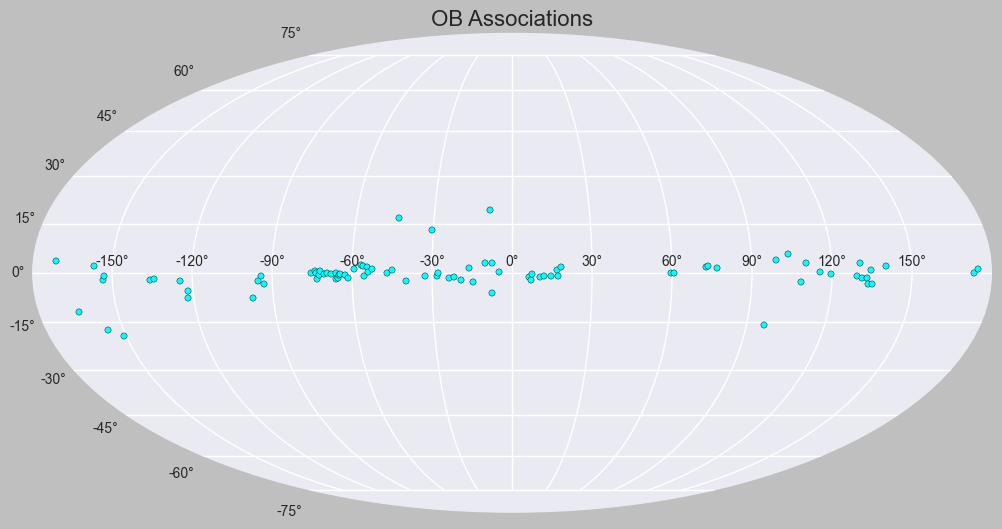

In [27]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
ax.grid(True)
plt.title("OB Associations",fontsize=16)
ax.scatter(OBCoords.galactic.l.wrap_at(180.*u.degree).radian,OBCoords.galactic.b.radian,c='cyan')

In [87]:
#Set up WWT layer
OB_layer = wwt.new_layer("Galactic Datasets", "OB Associations", OBCat.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"8",\
              "ShowFarSide":"True",\
              "AltColumn":"4",\
              "AltType":"Distance",\
              "AltUnit":"Parsecs",\
              "RaUnits":"Degrees",\
              "PlotType":"Circle",\
              "ColorValue":"ARGBColor:255:64:64:255",\
              "TimeSeries":"False"}
OB_layer.set_properties(props_dict)
#Send data to WWT client
OB_layer.update(data=OBCat, purge_all=True, no_purge=False, show=True)